In [5]:
!pip install pandas numpy scikit-learn matplotlib gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


# **1. Memuat Data Set**



In [6]:
import pandas as pd
import numpy as np

# Buat dataset sintetis
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-03-31')
sales = np.random.randint(50, 200, len(dates))  # Penjualan harian
promotions = np.random.choice([0, 1], len(dates), p=[0.7, 0.3])  # Promosi: 0 atau 1

# Gabungkan ke dalam DataFrame
data = pd.DataFrame({'Date': dates, 'Sales': sales, 'Promotion': promotions})

# Simpan dataset ke file CSV
data.to_csv('sales_data.csv', index=False)
print("Dataset dibuat dan disimpan sebagai 'sales_data.csv'.")

# Tampilkan beberapa data
data.head()


Dataset dibuat dan disimpan sebagai 'sales_data.csv'.


,Date,Sales,Promotion
0,2023-01-01,152,1
1,2023-01-02,142,1
2,2023-01-03,64,0
3,2023-01-04,156,0
4,2023-01-05,121,0


# 2. Melatih Model **Perceptron**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_absolute_error
import pickle

# Load dataset
data = pd.read_csv('sales_data.csv')

# Fitur (X) dan target (y)
X = data[['Promotion']]  # Fitur: Promosi (0 atau 1)
y = data['Sales']        # Target: Penjualan harian

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model perceptron
model = Perceptron()
model.fit(X_train_scaled, y_train)

# Evaluasi model
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Simpan model dan scaler
with open('perceptron_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model dan scaler telah disimpan.")


Mean Absolute Error: 52.44444444444444
Model dan scaler telah disimpan.


# 3. Antarmuka dengan **Gradio**

In [8]:
import gradio as gr

# Load model dan scaler
with open('perceptron_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Fungsi prediksi
def predict_sales(promotion):
    scaled_input = scaler.transform([[promotion]])
    prediction = model.predict(scaled_input)
    return f"Prediksi Penjualan: {int(prediction[0])} unit"

# Antarmuka Gradio
interface = gr.Interface(
    fn=predict_sales,
    inputs=gr.Number(label="Apakah ada promosi? (0=Tidak, 1=Ya)"),
    outputs="text",
    title="Prediksi Penjualan Harian",
    description="Masukkan status promosi (0 atau 1), dan dapatkan prediksi penjualan harian."
)

# Jalankan aplikasi
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9bf8b15b0bcae8998f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **4. Grafik Akurasi**

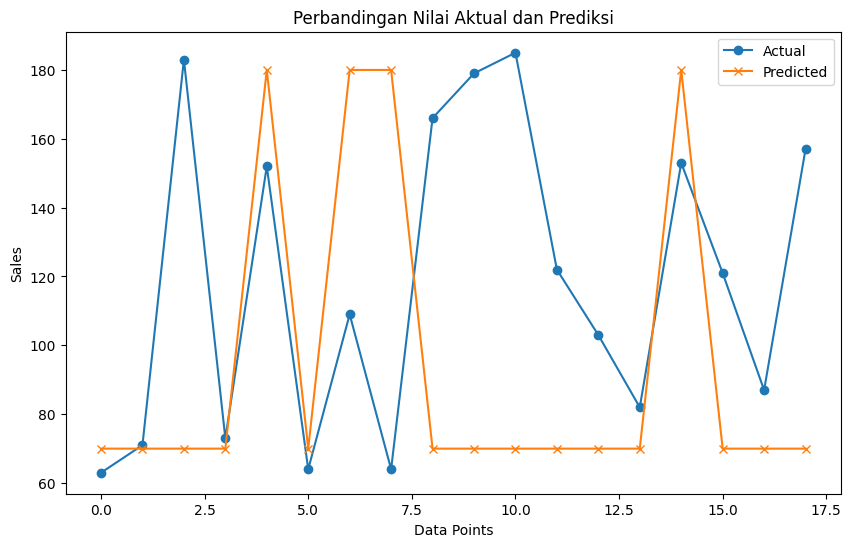

In [9]:
import matplotlib.pyplot as plt

# Grafik perbandingan nilai aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [10]:
from google.colab import files
files.download('perceptron_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>